In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [18]:
X, Y = datasets.make_classification(n_samples = 1000, n_classes = 2, random_state = 3, n_features = 2,
                                    n_clusters_per_class = 1, n_informative = 2, n_redundant = 0)

In [19]:
print(X.shape, Y.shape)

(1000, 2) (1000,)


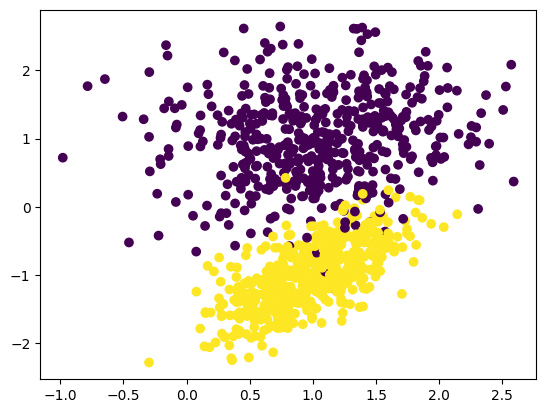

In [20]:
plt.scatter(X[:, 0], X[:, 1], c = Y)

In [21]:
np.unique(Y)

array([0, 1])

In [22]:
Y[Y == 0] = -1

In [23]:
np.unique(Y)

array([-1,  1])

In [24]:
class SVM:
    
    def __init__(self, c = 1):
        self.c = c
        self.w = 0
        self.b = 0
        
    def hinge_loss(self, W, b, X, Y):
        loss = 0
        loss += 0.5 * np.dot(W, W.T)
        
        for i in range(X.shape[0]):
            j_hat = Y[i] * (np.dot(W, X[i]) + b)
            loss += self.c * max(0, (1 - j_hat))
        
        return loss[0]
    
    def gradient_descent(self, X, Y, epochs = 500, lr_rate = 0.03, batch = 100):
        weight = np.zeros((1, X.shape[1]))
        bias = 0
        loss = self.hinge_loss(weight, bias, X, Y)
        print(loss)
        
        epoch_loss = []
        
        for i in range(epochs):
            total_samples = np.arange(X.shape[0])
            np.random.shuffle(total_samples)
            epoch_loss.append(self.hinge_loss(weight, bias, X, Y))
            
            for b in range(int(X.shape[0] / batch)):
                grad_w = 0
                grad_b = 0
                
                for j in range(b * batch, (b + 1) * batch):
                    j = total_samples[j]
                    f_margin = Y[j] * (np.dot(weight, X[j]) + bias)
                    
                    if f_margin >= 1:
                        grad_b += 0
                        grad_w += 0
                    else:
                        grad_w += self.c * Y[j] * X[j]
                        grad_b += self.c * Y[j]
                        
                weight = weight - lr_rate * weight + lr_rate * grad_w
                bias = bias + lr_rate * grad_b
                
        self.w = weight
        self.b = bias
        return weight, bias, epoch_loss

In [25]:
mysvm = SVM()
W, b, losses = mysvm.gradient_descent(X, Y)

[1000.]


In [26]:
losses

[array([1000.]),
 array([106.05032194]),
 array([104.10352699]),
 array([113.96021862]),
 array([96.91534907]),
 array([109.28666792]),
 array([97.72917505]),
 array([95.37949228]),
 array([92.73934857]),
 array([103.95261344]),
 array([104.18025469]),
 array([111.32095309]),
 array([113.267894]),
 array([94.65728052]),
 array([94.11530845]),
 array([95.35927708]),
 array([103.38569635]),
 array([103.24552496]),
 array([97.94709694]),
 array([107.78276656]),
 array([109.17501766]),
 array([97.68900908]),
 array([93.69254539]),
 array([95.54363632]),
 array([98.50320533]),
 array([99.71837471]),
 array([109.98610957]),
 array([95.11213969]),
 array([94.53788992]),
 array([99.67190544]),
 array([110.85013476]),
 array([139.14640383]),
 array([93.91831247]),
 array([95.96658258]),
 array([96.90270705]),
 array([95.04977713]),
 array([94.98501686]),
 array([113.84706728]),
 array([99.51188847]),
 array([108.14566785]),
 array([92.83427741]),
 array([110.05727745]),
 array([95.64781714]),
 

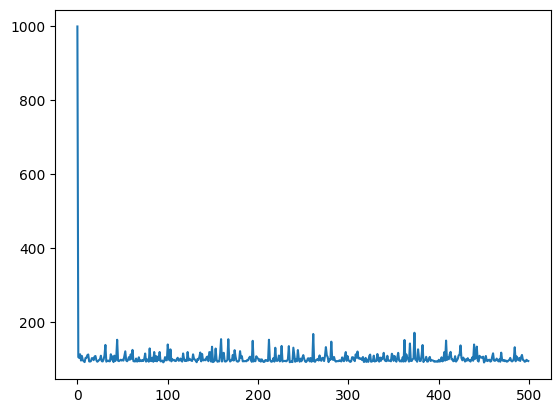

In [27]:
plt.plot(losses)

In [28]:
W, b

(array([[ 0.77243483, -2.47110586]]), -1.2599999999999971)

In [29]:
def visualise(w1, w2, b):
    X_axis = np.linspace(-2, 3, 10)
    
    Y_axis = -(w1 * X_axis + b)/w2
    
    sup_vec_1 = -(w1 * X_axis + b + 1)/w2
    sup_vec_2 = -(w1 * X_axis + b - 1)/w2
    
    plt.plot(X_axis, Y_axis)
    plt.plot(X_axis, sup_vec_1)
    plt.plot(X_axis, sup_vec_2)
    
    plt.scatter(X[:, 0], X[:, 1], c = Y)
    plt.show()

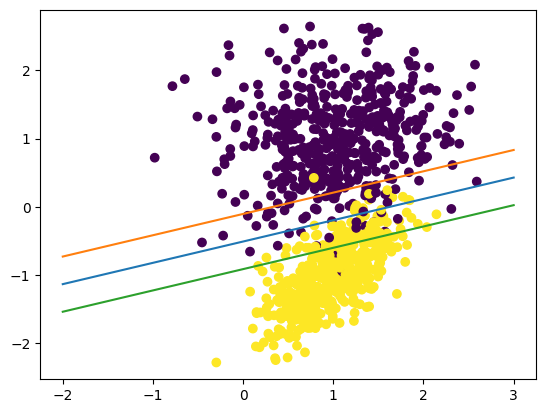

In [30]:
visualise(W[0][0], W[0][1], b)